# Lesson 2

## DBSCAN

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

Let's create a fake dataset for classification.

In [2]:
#random_state = 4
# random_state = 135
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

In [3]:
X_df = pd.DataFrame(data=X, columns = ['X1','X2'])
X_df.head()

,X1,X2
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569


## First model

Now let's create an instance of DBSCAN and train the model.

In [4]:
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
#model.fit(X)
#yhat = model.predict(X)
yhat = model.fit_predict(X)

In [5]:
yhat

array([ 0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  1, -1,  1,  1,  0,  0, -1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  0,  1, -1,  1, -1,  0,  0,  0,  0,  1,  1,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1, -1, -1,  0,  0,  0,  0,
        1,  0,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  1, -1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1,  0,  1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0, -1,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  1

In [6]:
X_df['cluster'] = yhat
X_df.head()

,X1,X2,cluster
0,1.225160,-0.951731,0
1,1.016304,-1.725175,0
2,0.335340,-1.724896,0
3,1.786348,-1.782653,-1
4,1.016751,1.062569,0


Now we collect the unique cluster predictions

In [7]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0,  1])

In [8]:
list(clusters)

[-1, 0, 1]

[-1,0,1]
[0,1,2]

Finally we visuallize the results

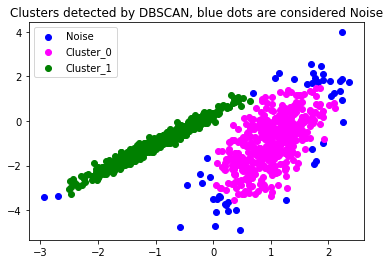

In [9]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
colors = ["b","magenta", "green"]
for index, cluster in enumerate(list(clusters)):
	# get row indexes for samples with this cluster
	#row_ix = np.where(yhat == cluster)
	#X_df[X_df['clusters'] == cluster]
	# create scatter of these samples
	#plt.scatter(X[row_ix, 0], X[row_ix, 1])
	if (cluster == -1): 
		c_label = "Noise"
	else:
		c_label = "Cluster_" + str(cluster)
	c_color = colors[index]
	plt.scatter(X_df[X_df['cluster']==cluster]['X1'],X_df[X_df['cluster']==cluster]['X2'], color=c_color, label=c_label)
	# plt.scatter(X_df.iloc[row_ix,0],X_df.iloc[row_ix,1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.legend()
plt.show()

## Fine tunning

In order to find out the best value for **$\epsilon$**, we follow these steps:

1. Compute the distance matrix between the all the observations
2. We fix the number of nearest neighbours **k** > 2.
3. We get all the distances from each point to it's k-nearest-neighbourgh.
4. We sort all those distances in descending order.
5. We plot those distances.

### Step 1

In [10]:
d = distance_matrix(X,X)
print(d)
print()

[[0.         0.80114688 1.17879693 ... 0.95066915 0.50635653 0.32186433]
 [0.80114688 0.         0.68096366 ... 1.75053308 0.51457012 0.4793154 ]
 [1.17879693 0.68096366 0.         ... 2.0601137  0.67550656 0.92665819]
 ...
 [0.95066915 1.75053308 2.0601137  ... 0.         1.39849862 1.27201336]
 [0.50635653 0.51457012 0.67550656 ... 1.39849862 0.         0.32135178]
 [0.32186433 0.4793154  0.92665819 ... 1.27201336 0.32135178 0.        ]]



### Step 2

We need to sort this matrix by row and to ignore the first element as it is the distance to every point to itself (ie. 0)

In [11]:
d2 = np.sort(d)[:,1:]
print(d2)

[[0.04678339 0.05495641 0.06871313 ... 4.60207174 4.83178799 5.03729709]
 [0.05482016 0.06268041 0.06826448 ... 4.29489772 4.34722148 5.83720603]
 [0.03310395 0.07735693 0.11856367 ... 4.4579024  4.50540792 6.01722808]
 ...
 [0.0117705  0.04484552 0.04866364 ... 5.15277772 5.37426647 5.594559  ]
 [0.03055169 0.03360156 0.05573955 ... 4.09765544 4.32814844 5.42363736]
 [0.06103933 0.07267225 0.07380287 ... 4.3712669  4.60428499 5.35840119]]


### Step 3

We select the k-th column, for example k = 3 (ie. the distance from each point to it's 4-th nearest neighbourgh.

In [12]:
f = d2[:,3]
print(f) # The distances between every point and it's 4th nearest neighbour.

[0.09887145 0.12416258 0.12322691 0.45978581 0.2818061  0.07329161
 0.08666835 0.1487333  0.10651486 0.14881625 0.10943899 0.0332418
 0.02290435 0.02943183 0.06138455 0.04672107 0.10818746 0.07451892
 0.06130875 0.03640626 0.07174781 0.09246413 0.18701101 0.0640187
 0.1111713  0.08346048 0.08491456 0.04324113 0.08316527 0.09896583
 0.14884055 0.11130921 0.11065738 0.26557146 0.04483342 0.04160557
 0.2079884  0.02068174 0.06512327 0.08791511 0.06598935 0.08483448
 0.0559474  0.08179211 0.14998855 0.08336932 0.03947943 0.08613517
 0.04489402 0.03403179 0.11200274 0.0586978  0.16918828 0.0719609
 0.09431476 0.05811056 0.17891934 0.10903584 0.16809184 0.0976431
 0.07899057 0.03248651 0.05022667 0.22044882 0.0387307  0.07407763
 0.10470374 0.04000203 0.07045291 0.1039023  0.07793365 0.02597327
 0.02561837 0.04603768 0.1551073  0.23416954 0.060858   0.17444277
 0.06437505 0.13027682 0.2989073  0.10619644 0.03236778 0.09878501
 0.10761344 0.12418619 0.29540854 0.06312143 0.05250079 0.09119512

### Step 4

We sort the 3-th distances in descending order.

In [13]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[1.90583738 1.09282406 0.90977804 0.71004117 0.67072691 0.64533837
 0.61977924 0.60670436 0.60454588 0.55229457 0.52008598 0.50237443
 0.47827229 0.45978581 0.45127113 0.42972007 0.41843451 0.41760291
 0.39416001 0.38335859 0.37934773 0.37862695 0.37845311 0.37785651
 0.37680239 0.3677763  0.36693836 0.36010186 0.35592828 0.35288361
 0.33811925 0.33506835 0.33405473 0.33303046 0.32834984 0.31914623
 0.31076861 0.30972706 0.2989073  0.29540854 0.29520968 0.29181073
 0.28933557 0.28770829 0.28708521 0.28650936 0.28603689 0.28321239
 0.2818061  0.27736247 0.27733572 0.27645749 0.27504945 0.2740539
 0.27308719 0.27146343 0.27104747 0.26807967 0.26557146 0.26323485
 0.26257223 0.26182207 0.26152399 0.25900445 0.25895716 0.25651448
 0.24921613 0.24915443 0.24783538 0.24783538 0.24335526 0.24313244
 0.24313244 0.23628399 0.23517811 0.23423374 0.23416954 0.23398294
 0.23260214 0.23076051 0.22733538 0.22604094 0.22544707 0.22484123
 0.22457167 0.2245453  0.224524   0.22259194 0.22257734 0.2220

### Step 5

We plot those distances.

MinPoints = 2 * 2 = 4

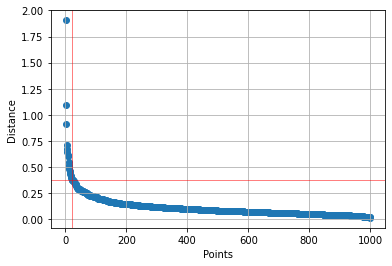

In [14]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Points")
plt.ylabel("Distance")
# Current selected settings for DBSCAN
xnew = 20
ynew = f_final[20]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

As you can see, even with this heuristic method is not obvious where there is an 'elbow'.

However, according to the plot if the MinPoints = 9 the $\epsilon$ value should be higher and equal to:

In [15]:
f_final[8]

0.6045458834296706

In [16]:
f_final[20]

0.3793477324254114

This value makes more sense according to the plot of the clusters at the begginning of the notebook, as too many points where considered "Noise" by the algorithm.

 ## Trying again

Let's plug those values in the algorithm to see what happens.

In [17]:
model2 = DBSCAN(eps=0.60, min_samples=9) # eps was 0.30 before
# fit model and predict clusters
yhat2 = model2.fit_predict(X)

In [18]:
# retrieve unique clusters
clusters2 = np.unique(yhat2)
clusters2

array([-1,  0])

That's really awfull!! It only detects one cluster!

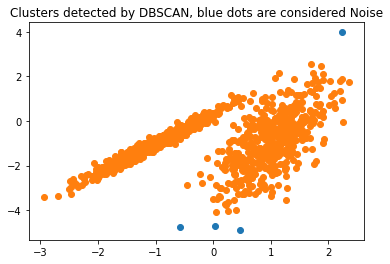

In [19]:
# create scatter plot for samples from each cluster
for cluster in clusters2:
	# get row indexes for samples with this cluster
	row_ix2 = np.where(yhat2 == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix2, 0], X[row_ix2, 1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()

## Another trial

According to the k- figure, it loooks like a 'tentative' elbow could be at $\epsilon$ = 0.25 which corresponds to point:

In [20]:
idx = np.argmin(np.abs(f_final - 0.25))
idx

66

So, let's try with $\epsilon$ = 0.25 and MinPoints = 4

In [21]:
model3 = DBSCAN(eps=0.25, min_samples=4) # eps = 0.30, 0.60
# fit model and predict clusters
yhat3 = model3.fit_predict(X)

In [22]:
# retrieve unique clusters
clusters3 = np.unique(yhat3)
clusters3

array([-1,  0,  1,  2])

Life is not so easy!!! Three clusters detected! Can you figure why?

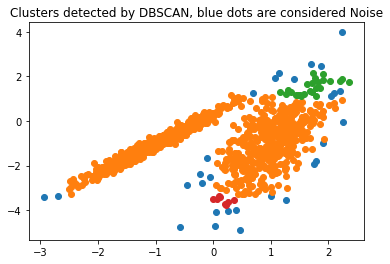

In [23]:
# create scatter plot for samples from each cluster
for cluster in clusters3:
	# get row indexes for samples with this cluster
	row_ix3 = np.where(yhat3 == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix3, 0], X[row_ix3, 1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()

In [24]:
model4 = DBSCAN(eps=0.60, min_samples=4)
# fit model and predict clusters
yhat4 = model4.fit_predict(X)

In [25]:
# retrieve unique clusters
clusters4 = np.unique(yhat4)
clusters4

array([-1,  0])

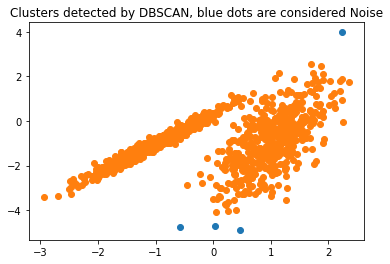

In [26]:
# create scatter plot for samples from each cluster
for cluster in clusters4:
	# get row indexes for samples with this cluster
	row_ix4 = np.where(yhat4 == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix4, 0], X[row_ix4, 1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()